Jumlah data sebelum: 52489
Jumlah data sesudah: 43931


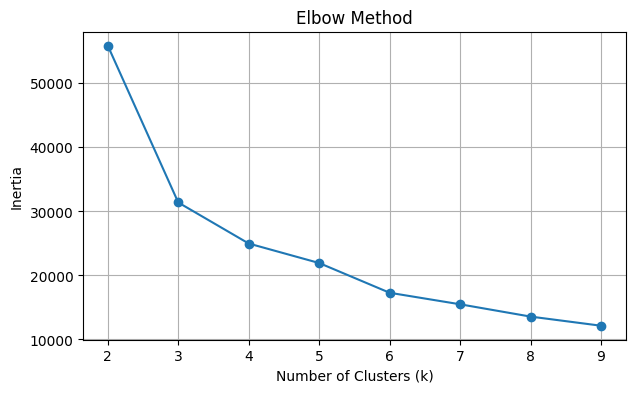

k = 2, Silhouette Score = 0.4478
k = 3, Silhouette Score = 0.4273
k = 4, Silhouette Score = 0.3605
k = 5, Silhouette Score = 0.3245
k = 6, Silhouette Score = 0.3721
k = 7, Silhouette Score = 0.3652
k = 8, Silhouette Score = 0.3502
k = 9, Silhouette Score = 0.3779
   Unnamed: 0                      time  latitude  longitude    depth  \
0           4  2024-12-30T00:43:14.853Z    2.4630   128.1684   55.415   
1           5  2024-12-29T06:38:41.963Z   -4.4675   137.0098    9.948   
2           6  2024-12-28T21:55:08.881Z    0.2717   122.0891  141.554   
3           8  2024-12-28T06:22:39.391Z    0.3190   129.6915   10.000   
4           9  2024-12-28T05:46:42.954Z   -5.1526   102.4081   34.713   

   magnitude                               place source  distance_km  \
0        4.1      83 km NNE of Tobelo, Indonesia   USGS           83   
1        4.1       172 km NW of Agats, Indonesia   USGS          172   
2        4.6  112 km WSW of Gorontalo, Indonesia   USGS          112   
3        

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ============================
# 1. Ambil dua kolom
# ============================

df_indonesia = pd.read_excel("D:/E/PENS/Semester 7/pengembangan aplikasi/Seismie/data/df_indonesia_afterPreprocessing.xlsx")
df_indonesia.head()

df = df_indonesia.copy()
X = df[['magnitude', 'depth']]

# ============================
# 2. Fungsi deteksi outlier (IQR)
# ============================
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

# ============================
# 3. Hapus outlier
# ============================
df_clean = remove_outliers_iqr(df, ['magnitude', 'depth'])
print("Jumlah data sebelum:", len(df))
print("Jumlah data sesudah:", len(df_clean))

# ============================
# 4. Normalisasi
# ============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[['magnitude', 'depth']])

# ============================
# 5. Tentukan jumlah cluster (Elbow Method)
# ============================
inertia = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# ============================
# 6. Silhouette Score (optional)
# ============================
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# ============================
# 7. K-Means (misal pilih k=3)
# ============================
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_clean['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# ============================
# 8. Gabungkan hasil cluster ke df_indonesia
# ============================
df_indonesia = df_indonesia.merge(
    df_clean[['time', 'cluster_kmeans']],
    on='time',
    how='left'
)

print(df_indonesia.head())


KMEANS winzoring

In [2]:
def winsorize_iqr(df, cols):
    df_wins = df.copy()
    for col in cols:
        Q1 = df_wins[col].quantile(0.25)
        Q3 = df_wins[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df_wins[col] = np.where(df_wins[col] < lower, lower, df_wins[col])
        df_wins[col] = np.where(df_wins[col] > upper, upper, df_wins[col])
        
    return df_wins


Contoh data setelah winsorizing:
   magnitude    depth
0        4.1   55.415
1        4.1    9.948
2        4.6  140.250
3        4.3   10.000
4        4.5   34.713


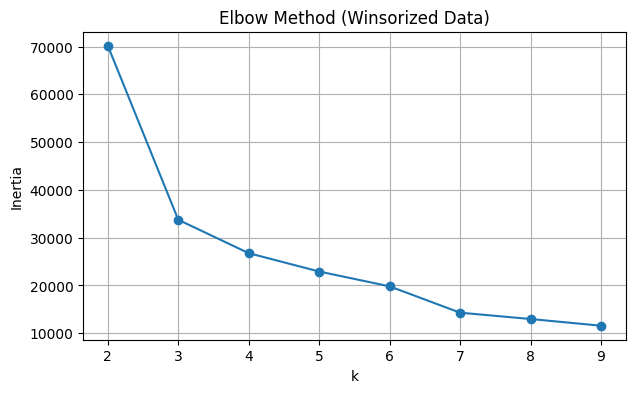

k = 2, Silhouette Score = 0.3417
k = 3, Silhouette Score = 0.4726
k = 4, Silhouette Score = 0.4048
k = 5, Silhouette Score = 0.3939
k = 6, Silhouette Score = 0.3647
k = 7, Silhouette Score = 0.3949
k = 8, Silhouette Score = 0.3985
k = 9, Silhouette Score = 0.3753
   Unnamed: 0                      time  latitude  longitude    depth  \
0           4  2024-12-30T00:43:14.853Z    2.4630   128.1684   55.415   
1           5  2024-12-29T06:38:41.963Z   -4.4675   137.0098    9.948   
2           6  2024-12-28T21:55:08.881Z    0.2717   122.0891  141.554   
3           8  2024-12-28T06:22:39.391Z    0.3190   129.6915   10.000   
4           9  2024-12-28T05:46:42.954Z   -5.1526   102.4081   34.713   

   magnitude                               place source  distance_km  \
0        4.1      83 km NNE of Tobelo, Indonesia   USGS           83   
1        4.1       172 km NW of Agats, Indonesia   USGS          172   
2        4.6  112 km WSW of Gorontalo, Indonesia   USGS          112   
3        

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ============================
# 1. Ambil kolom
# ============================

df_indonesia = pd.read_excel("D:/E/PENS/Semester 7/pengembangan aplikasi/Seismie/data/df_indonesia_afterPreprocessing.xlsx")
df_indonesia.head()

df = df_indonesia.copy()
X = df[['magnitude', 'depth']]

# ============================
# 2. Winsorizing Outlier
# ============================
df_wins = winsorize_iqr(df, ['magnitude', 'depth'])

print("Contoh data setelah winsorizing:")
print(df_wins[['magnitude', 'depth']].head())

# ============================
# 3. Normalisasi
# ============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wins[['magnitude', 'depth']])

# ============================
# 4. Elbow Method
# ============================
inertia = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method (Winsorized Data)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# ============================
# 5. Silhouette Score
# ============================
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# ============================
# 6. K-Means final (misal k=3)
# ============================
k_final = 3
kmeans = KMeans(n_clusters=k_final, random_state=42)
df_wins['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# ============================
# 7. Masukkan hasil cluster ke df_indonesia
# ============================
df_indonesia['cluster_kmeans'] = df_wins['cluster_kmeans']

print(df_indonesia.head())
